### Visualizations of Capillary Rise Between Parallel Glass Plates

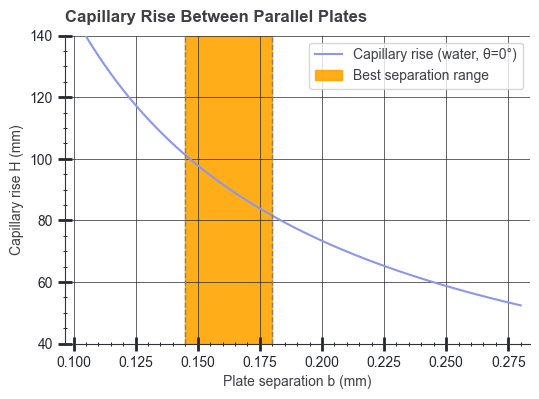

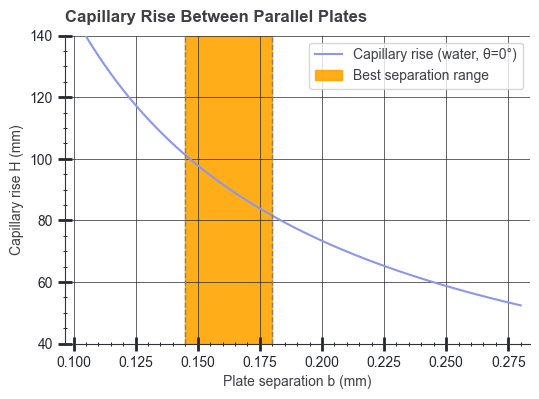

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from aquarel import load_theme

theme = (
    load_theme("umbra_light").set_overrides({
    "figure.facecolor": 'white',
    "axes.facecolor": 'white'
})
    .set_grid(draw=False)
)

# Constants for water at ~20°C
gamma = 0.072  # N/m, surface tension
rho = 1000     # kg/m³, density
g = 9.81       # m/s²
theta = 0      # contact angle in degrees

# Convert contact angle to radians and calculate cos(theta)
cos_theta = np.cos(np.radians(theta))

# Gap widths from 0.01 mm to 0.5 mm
b_values = np.linspace(0.1e-3, 0.28e-3, 500)  # in meters

# Capillary rise formula
H_values = (2 * gamma * cos_theta) / (rho * g * b_values)  # in meters

with theme:
    # Convert to mm
    plt.figure(figsize=(6,4))
    plt.plot(b_values * 1e3, H_values * 1000, label="Capillary rise (water, θ=0°)")
    plt.ylim(40, 140)
    plt.xlabel("Plate separation b (mm)")
    plt.ylabel("Capillary rise H (mm)")

    best_min = 0.145  # mm
    best_max = 0.18  # mm
    plt.axvspan(best_min, best_max, color='orange', alpha=0.9, label="Best separation range")
    plt.axvline(best_min, color='gray', linestyle='--', linewidth=1)
    plt.axvline(best_max, color='gray', linestyle='--', linewidth=1)

    plt.title("Capillary Rise Between Parallel Plates")
    plt.grid(True)
    plt.legend()
    plt.savefig("figures/caprise.pdf")
    plt.show()